In [1]:
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
import pandas as pd
import rubin_sim.maf as maf
from rubin_sim.maf import radar

In [2]:
def norm_df(
    df,
    runs,
    cols,
    norm_run="baseline",
    invert_cols=None,
    reverse_cols=None,
    run_label="run_name",
    mag_cols=[],
):
    """
    Normalize values in a dataframe to a given run
    Parameters
    ----------
    df : pandas.DataFrame
        The input data frame
    runs : list of str
        A list of run numes
    cols : list of str
        A list of columns in df to use
    norm_run : str
        The row to use to normalize things to
    invert_cols : list of str
        A list of column names that should be inverted (e.g., columns that
        are uncertainties and are better with a smaller value)
    reverse_cols : list of str
        Columns to reverse (e.g., magnitudes)
    run_label : str (run_name)
        The column that has run names
    mag_cols : list of str
        Columns that are in magnitudes
    """
    indices = [np.max(np.where(df.index == name)[0]) for name in runs]
    out_df = df[cols].iloc[indices].copy()
    if reverse_cols is not None:
        for colname in reverse_cols:
            out_df[colname] = -out_df[colname]
    if invert_cols is not None:
        for colname in invert_cols:
            out_df[colname] = 1.0 / out_df[colname]
    if norm_run is not None:
        indx = np.max(np.where(out_df.index == norm_run)[0])
        for col in out_df.columns:
            # maybe just check that it's not a
            if col != "run_name":
                if (col in mag_cols) | (mag_cols == "all"):
                    out_df[col] = 1.0 + (out_df[col] - out_df[col].iloc[indx])
                else:
                    out_df[col] = (
                        1.0
                        + (out_df[col] - out_df[col].iloc[indx])
                        / out_df[col].iloc[indx]
                    )
    return out_df

In [3]:
data_loaded = pd.read_hdf('summary.h5')
#data_loaded = pd.read_csv('summary.csv')


In [4]:
[col for col in data_loaded.columns if 'only DDF observations' in col and 'Median' in col and 'reducezlim' in col]

['Median SNNSNMetric DD:COSMOS_reducezlim DD:COSMOS all bands, only DDF observations HealpixSubsetSlicer',
 'Median SNNSNMetric DD:ECDFS_reducezlim DD:ECDFS all bands, only DDF observations HealpixSubsetSlicer',
 'Median SNNSNMetric DD:EDFS_reducezlim DD:EDFS all bands, only DDF observations HealpixSubsetSlicer',
 'Median SNNSNMetric DD:ELAISS1_reducezlim DD:ELAISS1 all bands, only DDF observations HealpixSubsetSlicer',
 'Median SNNSNMetric DD:WFD_reducezlim DD:WFD all bands, only DDF observations HealpixSubsetSlicer',
 'Median SNNSNMetric DD:XMM_LSS_reducezlim DD:XMM_LSS all bands, only DDF observations HealpixSubsetSlicer']

In [8]:
name_dict = {'best18k parallax HealpixSlicer': 'parallax best 18k',
            'best18k properMotion HealpixSlicer': 'proper motion best 18k',
            'Fraction detected of total (mean) MicrolensingMetric_detect tE 20_30 days UserPointsSlicer': '20-30d microlensing\ndetection',
            'Fraction detected of total (mean) MicrolensingMetric_detect tE 60_90 days UserPointsSlicer': '60-90d microlensing\ndetection',
            'fONv MedianNvis fO HealpixSlicer': 'fO N vis',
            'Total detected SNNSNMetric_reducen_sn DDF excluded HealpixSlicer': 'SNe, N',
             'Median SNNSNMetric_reducezlim DDF excluded HealpixSlicer': 'SNe, zlim',
            '3x2ptFoM Exgalm5WithCuts i band non-DD year 10 HealpixSlicer': '3x2 i-band',
            'Median WeakLensingNvisits gri band non-DD HealpixSlicer': 'WL Nvis i-band',
            'Total detected KNePopMetric_all_ztfrest_simple all models UserPointsSlicer': 'KNe ZTF simple',
            'Total detected XRBPopMetric_early_detect UserPointsSlicer': 'XRB\nearly detect',
            'VolumeSum Brown Dwarf, L7 HealpixSlicer': 'Brown Dwarf Vol',
            'CumulativeCompleteness H <= 16.000000 DiscoveryNChances NEO 3 pairs in 15 nights SNR=3 detection loss MoObjSlicer': 'NEO bright',
            'CumulativeCompleteness H <= 22.000000 DiscoveryNChances NEO 3 pairs in 15 nights SNR=3 detection loss MoObjSlicer': 'NEO faint',
            'CumulativeCompleteness H <= 6.000000 DiscoveryNChances TNO 3 pairs in 15 nights SNR=3 detection loss MoObjSlicer': 'TNO',
            #'CumulativeCompleteness H <= 16.000000 DiscoveryNChances Vatira 1 quad in 1 night detection loss MoObjSlicer': 'Vatira'}
            }
invert_cols = ['parallax best 18k', 'proper motion best 18k']
mag_cols = ['20-30d microlensing\ndetection', '60-90d microlensing\ndetection', 'NEO bright', 'NEO faint', 'TNO', 'Vatira']

data = pd.DataFrame()
for key in name_dict:
    data[name_dict[key]] = data_loaded[key]
    

mag_dict = {'Median CoaddM5 g HealpixSlicer': 'g',
 'Median CoaddM5 i HealpixSlicer': 'i',
 'Median CoaddM5 r HealpixSlicer': 'r',
 'Median CoaddM5 u HealpixSlicer': 'u',
 'Median CoaddM5 y HealpixSlicer': 'y',
 'Median CoaddM5 z HealpixSlicer': 'z'}

mag_data = pd.DataFrame()
for key in mag_dict:
    mag_data[mag_dict[key]] = data_loaded[key]
    
    
    
ddf_dict = {'Sum SNNSNMetric DD:COSMOS_reducen_sn DD:COSMOS all bands, only DDF observations HealpixSubsetSlicer' : 'N SN COSMOS',
           'Sum SNNSNMetric DD:ECDFS_reducen_sn DD:ECDFS all bands, only DDF observations HealpixSubsetSlicer' : 'N SN ECDFS',
           'Sum SNNSNMetric DD:EDFS_reducen_sn DD:EDFS all bands, only DDF observations HealpixSubsetSlicer' : 'N SN EDFS',
           'Sum SNNSNMetric DD:ELAISS1_reducen_sn DD:ELAISS1 all bands, only DDF observations HealpixSubsetSlicer' : 'N SN ELAISS1',
           'Sum SNNSNMetric DD:XMM_LSS_reducen_sn DD:XMM_LSS all bands, only DDF observations HealpixSubsetSlicer' : 'N SN XMM_LSS',
            
           'Median SNNSNMetric DD:COSMOS_reducezlim DD:COSMOS all bands, only DDF observations HealpixSubsetSlicer': 'zlim COSMOS',
            'Median SNNSNMetric DD:ECDFS_reducezlim DD:ECDFS all bands, only DDF observations HealpixSubsetSlicer': 'zlim ECDFS',
            'Median SNNSNMetric DD:EDFS_reducezlim DD:EDFS all bands, only DDF observations HealpixSubsetSlicer': 'zlim EDFS',
            'Median SNNSNMetric DD:ELAISS1_reducezlim DD:ELAISS1 all bands, only DDF observations HealpixSubsetSlicer': 'zlim ELAISS1',
            'Median SNNSNMetric DD:XMM_LSS_reducezlim DD:XMM_LSS all bands, only DDF observations HealpixSubsetSlicer': 'zlim XMM_LSS',
            
           }

ddf_data = pd.DataFrame()
for key in ddf_dict:
    ddf_data[ddf_dict[key]] = data_loaded[key]
 

In [9]:
data

,parallax best 18k,proper motion best 18k,20-30d microlensing\ndetection,60-90d microlensing\ndetection,fO N vis,"SNe, N","SNe, zlim",3x2 i-band,WL Nvis i-band,KNe ZTF simple,XRB\nearly detect,Brown Dwarf Vol,NEO bright,NEO faint,TNO
change_fields_fi_0_v3.1_10yrs,0.823865,0.188353,0.3241,0.4580,785.0,110191.465651,0.297210,39.068002,418.0,337.0,1956.0,168075.188697,0.9300,0.634393,0.723954
change_fields_fi_10_v3.1_10yrs,0.821536,0.188406,0.3311,0.4535,787.0,108968.301294,0.300683,38.963214,418.0,366.0,2022.0,168434.488385,0.9306,0.640416,0.725058
change_fields_fi_11_v3.1_10yrs,0.822618,0.188422,0.3263,0.4541,786.0,108658.106307,0.299910,39.259190,418.0,344.0,2022.0,168631.566500,0.9302,0.638530,0.724890
change_fields_fi_12_v3.1_10yrs,0.825782,0.187830,0.3331,0.4683,787.0,108933.167219,0.299072,39.088972,419.0,344.0,2006.0,168262.393801,0.9298,0.633380,0.725145
change_fields_fi_13_v3.1_10yrs,0.827766,0.188314,0.3219,0.4488,787.0,107854.553655,0.299096,39.184810,418.0,340.0,1976.0,168958.529468,NaN,NaN,0.723870
change_fields_fi_14_v3.1_10yrs,0.829286,0.188392,0.3219,0.4520,787.0,108586.870436,0.301493,39.252863,419.0,359.0,1953.0,168987.430237,0.9302,0.638248,0.724770
change_fields_fi_15_v3.1_10yrs,0.828160,0.187954,0.3203,0.4511,786.0,107974.258318,0.301365,39.086453,418.0,320.0,1958.0,168569.099852,NaN,NaN,0.724338
change_fields_fi_16_v3.1_10yrs,0.824886,0.188691,0.3295,0.4615,787.0,108225.786271,0.299840,39.127650,418.0,319.0,1954.0,169260.625955,NaN,NaN,0.724991
change_fields_fi_17_v3.1_10yrs,0.824334,0.188342,0.3232,0.4621,787.0,108378.069586,0.302198,39.236247,419.0,319.0,2004.0,168720.174922,NaN,NaN,0.724637
change_fields_fi_18_v3.1_10yrs,0.821595,0.188076,0.3239,0.4515,788.0,108203.954637,0.301180,39.171135,419.0,346.0,1963.0,168369.524990,NaN,NaN,0.724617


In [10]:
mag_data

,g,i,r,u,y,z
change_fields_fi_0_v3.1_10yrs,26.702932,26.280585,26.806024,25.674057,24.746592,25.543545
change_fields_fi_10_v3.1_10yrs,26.697908,26.283903,26.800257,25.667603,24.755617,25.542175
change_fields_fi_11_v3.1_10yrs,26.691890,26.282061,26.808278,25.665977,24.753641,25.544790
change_fields_fi_12_v3.1_10yrs,26.705995,26.275987,26.800636,25.661799,24.751705,25.545733
change_fields_fi_13_v3.1_10yrs,26.695375,26.276644,26.800207,25.669679,24.755349,25.541800
change_fields_fi_14_v3.1_10yrs,26.696504,26.278580,26.807049,25.659620,24.752491,25.549152
change_fields_fi_15_v3.1_10yrs,26.698034,26.274064,26.804959,25.675764,24.759259,25.540851
change_fields_fi_16_v3.1_10yrs,26.701594,26.280132,26.808397,25.661836,24.756983,25.546883
change_fields_fi_17_v3.1_10yrs,26.688074,26.285306,26.803007,25.663036,24.759663,25.547137
change_fields_fi_18_v3.1_10yrs,26.704049,26.281087,26.813620,25.673074,24.753446,25.541665


In [11]:
ddf_data

,N SN COSMOS,N SN ECDFS,N SN EDFS,N SN ELAISS1,N SN XMM_LSS,zlim COSMOS,zlim ECDFS,zlim EDFS,zlim ELAISS1,zlim XMM_LSS
change_fields_fi_0_v3.1_10yrs,496.366954,263.241015,444.488553,179.716997,173.945286,0.587058,0.584680,0.526575,0.566540,0.568106
change_fields_fi_10_v3.1_10yrs,496.909542,261.026366,437.623210,176.654537,171.200958,0.585051,0.583863,0.525899,0.566468,0.570129
change_fields_fi_11_v3.1_10yrs,496.021382,263.082922,443.096007,179.873418,161.930840,0.585461,0.583450,0.524699,0.567018,0.569727
change_fields_fi_12_v3.1_10yrs,494.816194,259.452256,439.187597,179.378842,165.006023,0.587022,0.584437,0.527422,0.565173,0.568106
change_fields_fi_13_v3.1_10yrs,495.743481,264.007824,441.021669,180.275374,168.007244,0.586982,0.582651,0.526795,0.566640,0.568893
change_fields_fi_14_v3.1_10yrs,493.394268,259.573136,440.366241,175.389183,167.622802,0.588697,0.583040,0.525485,0.567847,0.566274
change_fields_fi_15_v3.1_10yrs,497.217929,262.808329,433.247651,179.753710,166.798143,0.585256,0.583331,0.525406,0.565036,0.571969
change_fields_fi_16_v3.1_10yrs,494.249030,260.382573,438.220743,181.010648,169.511209,0.586316,0.583534,0.524679,0.564846,0.571258
change_fields_fi_17_v3.1_10yrs,495.270347,264.654571,431.156751,182.537571,165.361645,0.586116,0.583439,0.524424,0.567081,0.571477
change_fields_fi_18_v3.1_10yrs,494.162917,264.587304,445.417267,178.155623,164.095399,0.588004,0.583762,0.527636,0.566299,0.570640


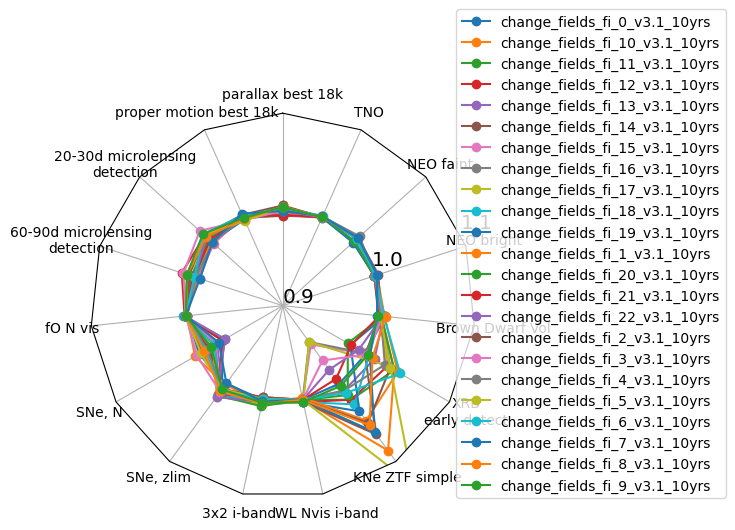

In [16]:
runs = [run for run in data.index ]
ndata = norm_df(data, runs, cols=data.columns.values.tolist(),
                invert_cols=invert_cols, mag_cols = mag_cols, norm_run='change_fields_fi_0_v3.1_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.9, 1.0, 1.1], bbox_to_anchor=(1.65, 0))

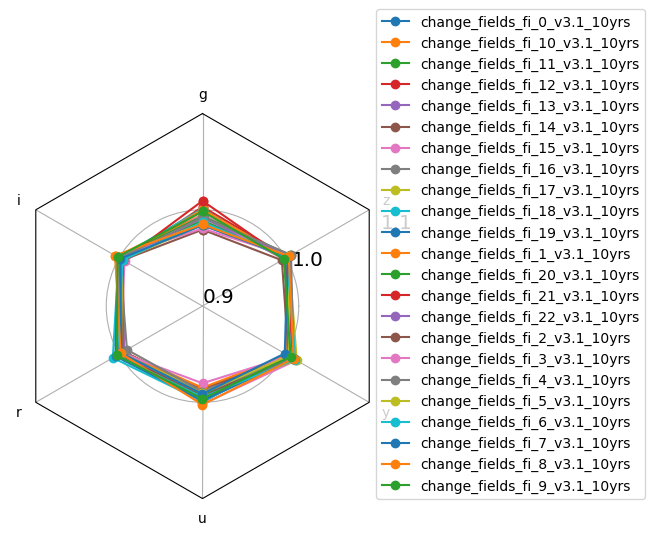

In [15]:
ndata = norm_df(mag_data, runs, cols=mag_data.columns.values.tolist(),
                mag_cols='all', norm_run='change_fields_fi_0_v3.1_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.9, 1.0, 1.1], bbox_to_anchor=(1.65, 0))

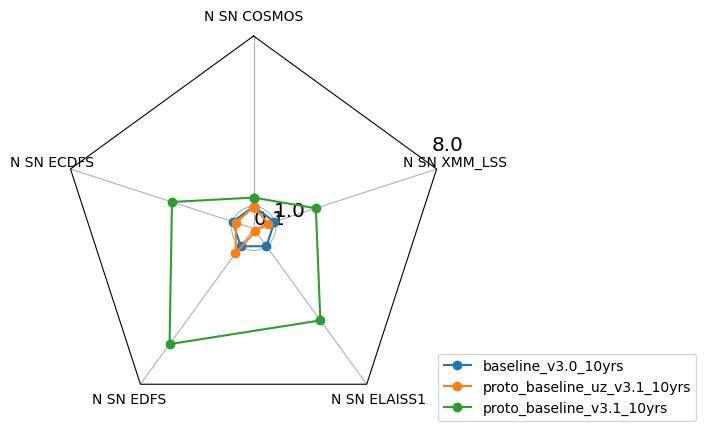

In [11]:
cols = [col for col in ddf_data.columns.values.tolist() if 'N SN' in col]

ndata = norm_df(ddf_data, runs, cols=cols,
                norm_run='baseline_v3.0_10yrs')
fig, ax = radar(ndata, legend=True, rgrids=[0.1, 1.0, 8], bbox_to_anchor=(1.65, 0))

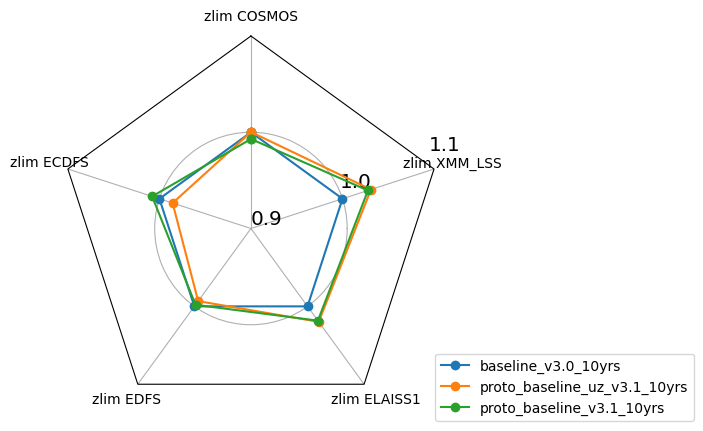

In [12]:
cols = [col for col in ddf_data.columns.values.tolist() if 'zlim' in col]

ndata = norm_df(ddf_data, runs, cols=cols,
                norm_run='baseline_v3.0_10yrs', mag_cols='all')
fig, ax = radar(ndata, legend=True, rgrids=[0.9, 1.0, 1.1], bbox_to_anchor=(1.65, 0))

In [13]:
ddf_data


,N SN COSMOS,N SN ECDFS,N SN EDFS,N SN ELAISS1,N SN XMM_LSS,zlim COSMOS,zlim ECDFS,zlim EDFS,zlim ELAISS1,zlim XMM_LSS
baseline_v3.0_10yrs,362.726856,72.383449,74.734786,37.378088,60.363667,0.594675,0.575080,0.526724,0.546128,0.539335
proto_baseline_uz_v3.1_10yrs,362.220035,61.618197,101.968397,8.633807,44.327408,0.594883,0.560668,0.519997,0.565969,0.570450
proto_baseline_v3.1_10yrs,496.606379,262.026773,445.803947,178.026152,168.273674,0.587677,0.583015,0.524709,0.564479,0.567134
